# Pinhole Projection Model

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

### Utility functions

In [29]:
from math import pi,cos,sin

### Function to create a figure with 3D graphic
def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#Adding quivers to a plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)

    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis


### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)


### Transformation functions

### Translation
def move (dx,dy,dz):
    T = np.eye(4)
    T[0,-1] = dx
    T[1,-1] = dy
    T[2,-1] = dz
    return T

### Rotation
def z_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix



# Functions to move the camera in its own reference frame

# Translation in its own frame
def own_move (dx,dy,dz,cam):

    c0 = np.eye(4)

    T = np.eye(4)
    T[0,-1]=dx
    T[1,-1]=dy
    T[2,-1]=dz

    cam = cam@T@c0
    return T, cam

# Rotation in its own frame
def own_z_rotation(angle, cam):
    angle = angle*pi/180
    c0 = np.eye(4)
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    cam = cam@rotation_matrix@c0
    return rotation_matrix, cam

def own_x_rotation(angle, cam):
    angle = angle*pi/180
    c0 = np.eye(4)
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    cam = cam@rotation_matrix@c0
    return rotation_matrix, cam

def own_y_rotation(angle, cam):
    angle = angle*pi/180
    c0 = np.eye(4)
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    cam = cam@rotation_matrix@c0
    return rotation_matrix, cam


### Creating the camera and world reference frame

Consider a camera represented by the reference frame shown below. Notice that the camera is aligned with the world reference frame, and its Z-axis — which represents the camera's optical axis — is pointing upward.


Camera Reference Frame: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
World Reference Frame: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Text(0.5, 0.92, 'Camera and World Reference Frames')

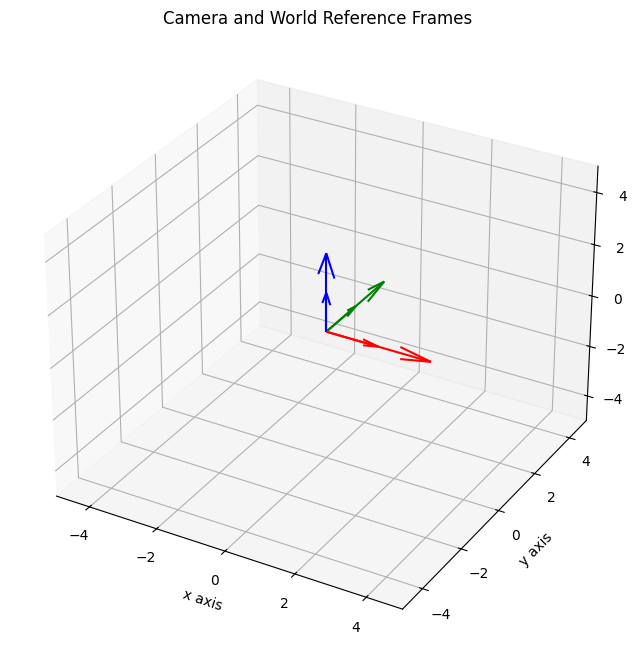

In [30]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))
#origin point
origin =np.array([[0],[0],[0],[1]])

# Create camera and world frames
cam  = np.hstack([base,origin])
world = np.hstack([base,origin])

print ('Camera Reference Frame: \n', cam)
print ('World Reference Frame: \n', world)

# Ploting the world reference frame and the camera frame
axis = set_plot(lim=[-5,5])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis = draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)
axis.set_title("Camera and World Reference Frames")


### Now let's include a house in the scene
#### We are going to use the same house that we created before

<Axes3D: xlabel='x axis', ylabel='y axis', zlabel='z axis'>

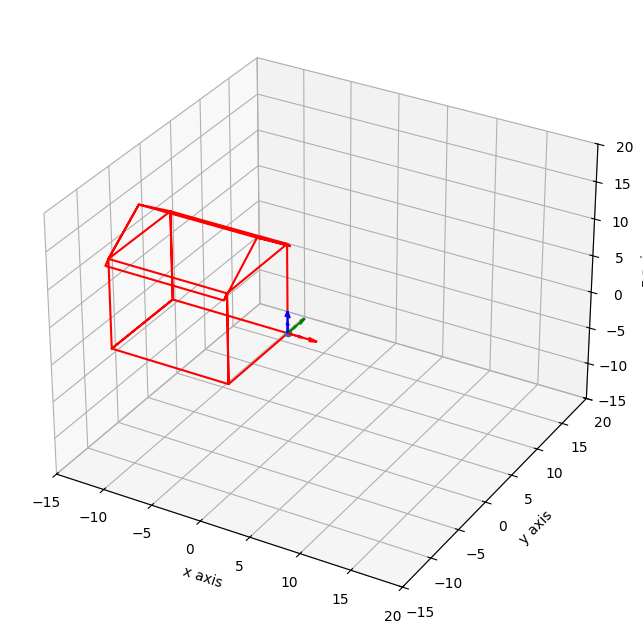

In [31]:
#Creating a house

house = np.array([[0,         0,         0],
         [0,  -10.0000,         0],
         [0, -10.0000,   12.0000],
         [0,  -10.4000,   11.5000],
         [0,   -5.0000,   16.0000],
         [0,         0,   12.0000],
         [0,    0.5000,   11.4000],
         [0,         0,   12.0000],
         [0,         0,         0],
  [-12.0000,         0,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,  -10.0000,         0],
         [0,  -10.0000,         0],
         [0,  -10.0000,   12.0000],
[-12.0000,  -10.0000,   12.0000],
  [-12.0000,         0,   12.0000],
         [0,         0,   12.0000],
         [0,  -10.0000,   12.0000],
         [0,  -10.5000,   11.4000],
  [-12.0000,  -10.5000,   11.4000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
         [0,   -5.0000,   16.0000],
         [0,    0.5000,   11.4000],
  [-12.0000,    0.5000,   11.4000],
  [-12.0000,         0,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,         0,         0],
  [-12.0000,         0,   12.0000],
  [-12.0000,         0,         0]])

house = np.transpose(house)

#add a vector of ones to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, np.ones(np.size(house,1))])

# Plotting everything together
ax0 = set_plot(lim=[-15,20])
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Ploting the house corner as a reference
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plotting the camera and world frames
draw_arrows(cam[:,-1],cam[:,0:3],ax0,1.5)
draw_arrows(world[:,-1],world[:,0:3],ax0,3)


## Let's position the camera with its Z-axis pointing toward the house and at a distance of 10 units from it.

Taking the world coordinate system as the reference frame, we will transform the camera object as follows:

1- Rotate the camera by -90 degrees around the X-axis.

2- Rotate the camera by 90 degrees around the Z-axis.

3- Translate the camera to position it at the point (15, -5, 6).



cam_0: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
cam: 
 [[ 0. -0. -1. 15.]
 [ 1.  0.  0. -5.]
 [ 0. -1.  0.  6.]
 [ 0.  0.  0.  1.]]


<Axes3D: xlabel='x axis', ylabel='y axis', zlabel='z axis'>

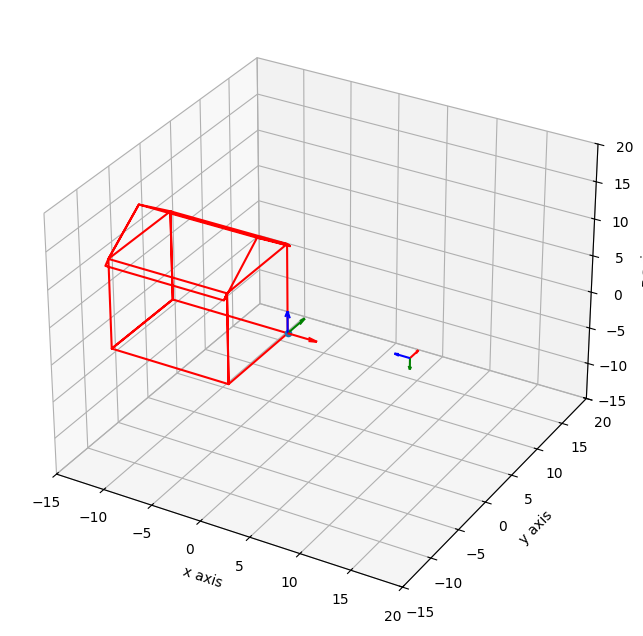

In [32]:
# Write your code below

cam_0 = cam

Rx = x_rotation (-90)
Rz = z_rotation(90)
T = move (15,-5,6)
M = T@Rz@Rx
cam  = np.dot(M,cam)

print ('cam_0: \n',cam_0)
print ('cam: \n',cam)

# Plotting everything together
ax0 = set_plot(lim=[-15,20])
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Ploting the house corner as a reference
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plotting the camera and world frames
draw_arrows(cam[:,-1],cam[:,0:3],ax0,1.5)
draw_arrows(world[:,-1],world[:,0:3],ax0,3)

Now consider that the camera has the following intrinsic parameters:

1- Focal length equal to 50 mm

2- A CCD of size 36 × 24 mm that produces an image of 1280 × 720 pixels

3- No skew

Construct the intrinsic parameter matrix and print it so you can check that it was created correctly. Write your code below.


In [33]:
# Define the intrinsic parameters as separate variables so you can chance each
# one of them later if you want

f = 50
w_p = 1280
w_mm = 36

h_p = 720
h_mm = 24
sx = w_p/w_mm
sy = h_p/h_mm
s_theta = 0
Ox = w_p/2
Oy = h_p/2

K = np.array([[f*sx, f*s_theta, Ox],[0, f*sy, Oy],[0, 0, 1]])

print(K)

[[1777.778    0.     640.   ]
 [   0.    1500.     360.   ]
 [   0.       0.       1.   ]]


Based on the rotations and translation applied to position the camera, define the extrinsic parameter matrix. Print the camera matrix and the extrinsic parameter matrix to compare.

Write your code here.


In [34]:
# The extrinsic parameter matrix is the inverse of the camera


M = T@Rz@Rx
G = np.linalg.inv(cam)
G1 = np.linalg.inv(M)

print(cam)
print(G)
print(G1)


[[ 0. -0. -1. 15.]
 [ 1.  0.  0. -5.]
 [ 0. -1.  0.  6.]
 [ 0.  0.  0.  1.]]
[[ 0.  1.  0.  5.]
 [-0.  0. -1.  6.]
 [-1.  0.  0. 15.]
 [ 0.  0.  0.  1.]]
[[ 0.  1.  0.  5.]
 [-0.  0. -1.  6.]
 [-1.  0.  0. 15.]
 [ 0.  0.  0.  1.]]


Now that you have the intrinsic and extrinsic parameter matrices, define the complete perspective projection matrix.

Then, use this matrix to project the house onto the image plane. You will do this by following these steps:

1- Multiply the projection matrix by the object to be projected. This object should be represented in homogeneous coordinates, in the form of a matrix where each column represents a point of the object.

2- After projection, the object points will be in the form
(kx,ky,k). To obtain the Cartesian coordinates of each projected point, divide the first two coordinates by the third, resulting in (x,y,1).

3- Generate the 2D image by plotting the projected points.

4- Keep in mind that the origin of the image is at the top-left corner, with the X-axis increasing from left to right and the Y-axis increasing from top to bottom.

If you prefer, you can create a function to perform the projection.

Write your code below. Some hints are provided to help you


[[ -640.     1777.778     0.    18488.889]
 [ -360.        0.    -1500.    14400.   ]
 [   -1.        0.        0.       15.   ]]


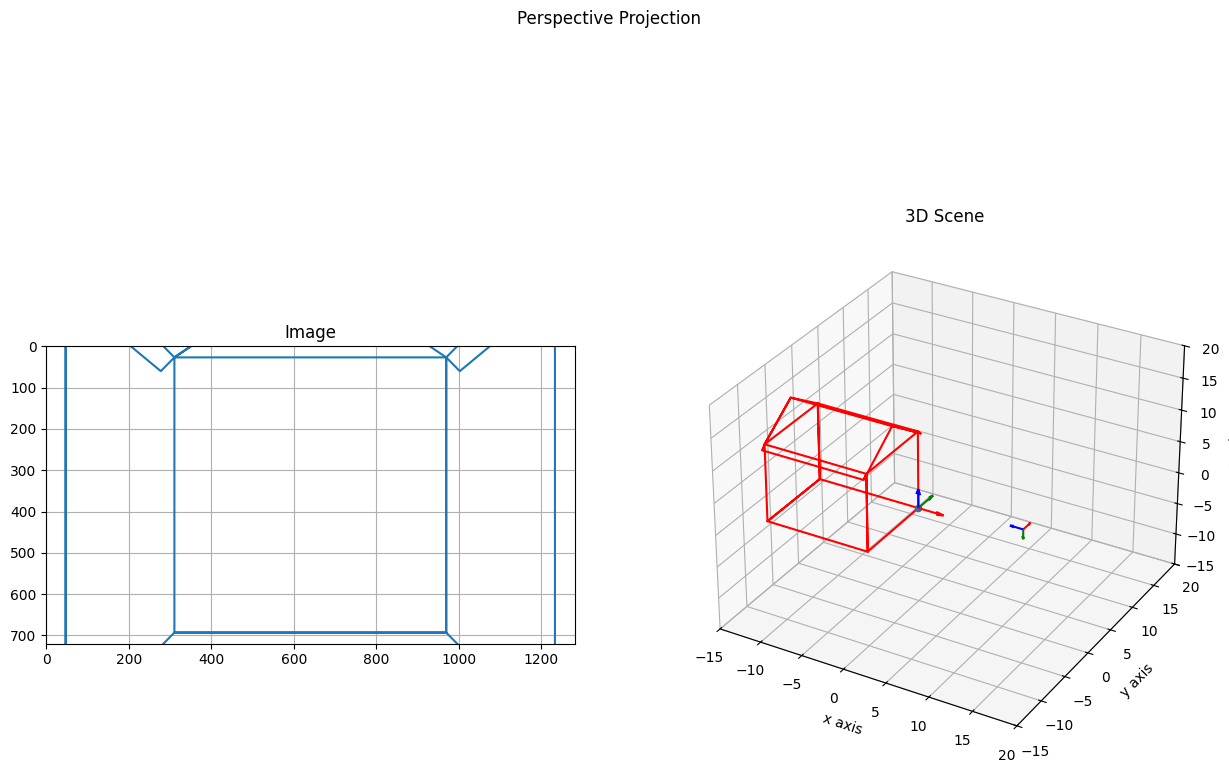

In [35]:
# Canonical projection matrix
P_can = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])

# Pinhole Projection Matrix
# IntrisicMatrix(K).CanProjMatrix(Pi_0).ExtrinsicMatrix(G)
Mproj= K@P_can@G
print(Mproj)

# Projecting the house onto the image plane

p_img = Mproj@house

#print(p_img)


# Obtain the Cartesian Coordinates by dividing the first two coordinates by
# the third one

p_img = p_img/p_img[2]

#print(p_img)

# Plotting the image created by the projection

fig = plt.figure(figsize=(15,10))
fig.suptitle("Perspective Projection")


ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Image")
# Adjust the X-axis limits, wich should be zero (0) and the width of the image
# Substitute width by the variable you defined before
ax1.set_xlim([0,w_p])
# Adjust the Y-axis limits, wich should be zero (0) and the height of the image
# Remember the Y-axis increases from top to bottom
# Thus, to flip the axis, assign the maximum first and the minimum last.
# Substitute height by the variable you defined before
ax1.set_ylim([h_p,0])
# Plot the project points of the house to see the image
# Substitute p_img for the image points that you calculated before
ax1.plot(p_img[0,:],p_img[1,:])

ax1.grid('True')
ax1.set_aspect('equal')


# Plotting the 3D scene
ax2 = fig.add_subplot(1,2,2,projection='3d')
set_plot(ax=ax2,figure=fig,lim=[-15,20],)
ax2.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Ploting the house corner as a reference
ax2.scatter(house[0,0], house[1,0], house[2,0],'b')
ax2.set_title("3D Scene")
# Plotting the camera and world frames
draw_arrows(cam[:,-1],cam[:,0:3],ax2,1.5)
draw_arrows(world[:,-1],world[:,0:3],ax2,3)

plt.show()



# EXTRA
### Let's create a function to do the perspective projection and, after that, use the transformation functions in the camera's own reference frame to move the camera and generate new images

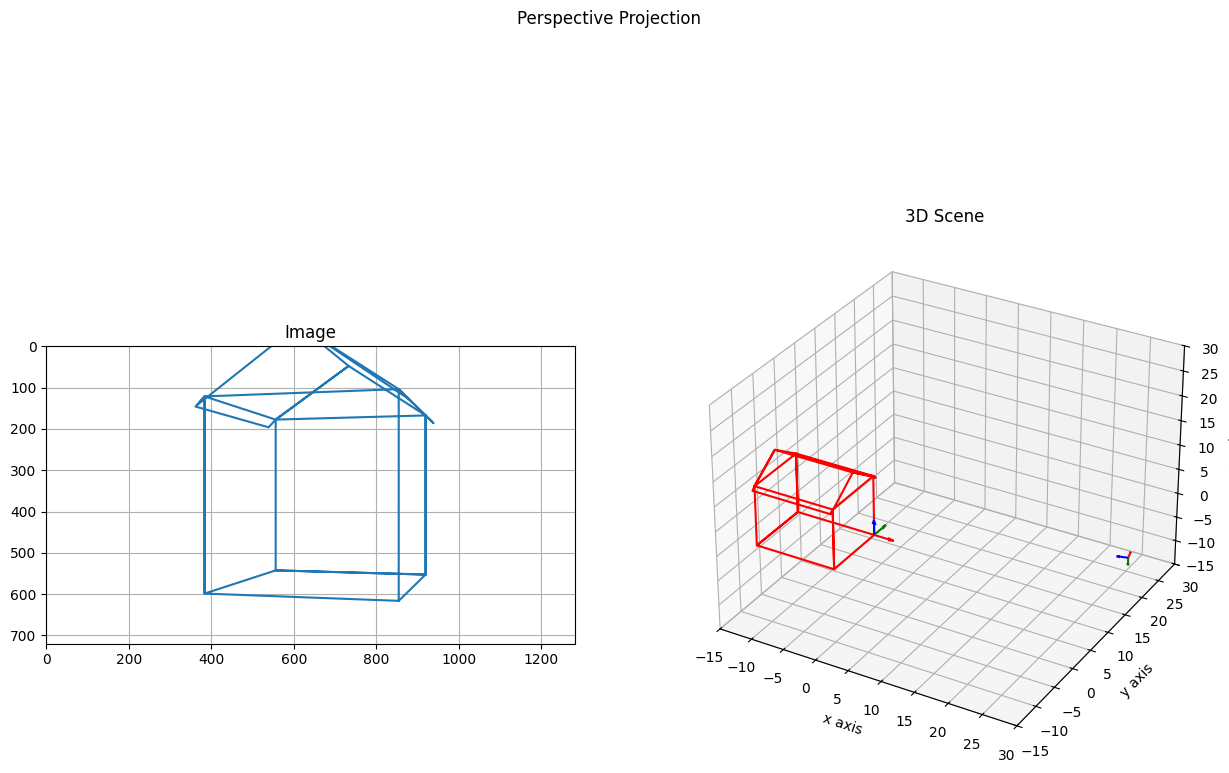

In [36]:
def project(K,G,obj,cam,world,show=True):
  # Canonical projection matrix
  P_can = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
  # Pinhole Projection Matrix
  Mproj= K@P_can@G
  # Project the object onto the image plane
  p_img = Mproj@obj
  p_img = p_img/p_img[2]

  if show:
    plot_projection(K,p_img,obj,cam,world)


  return p_img


def plot_projection(K,p_img,obj,cam,world):

  # Plotting the image created by the projection
  fig = plt.figure(figsize=(15,10))
  fig.suptitle("Perspective Projection")


  ax1 = fig.add_subplot(1,2,1)
  ax1.set_title("Image")
  # Adjust the X-axis limits, wich should be zero (0) and the width of the image
  # Substitute width by the variable you defined before
  ax1.set_xlim([0,K[0,-1]*2])
  # Adjust the Y-axis limits, wich should be zero (0) and the height of the image
  # Remember the Y-axis increases from top to bottom
  # Thus, to flip the axis, assign the maximum first and the minimum last.
  # Substitute height by the variable you defined before
  ax1.set_ylim([K[1,-1]*2,0])
  # Plot the project points of the house to see the image
  # Substitute p_img for the image points that you calculated before
  ax1.plot(p_img[0,:],p_img[1,:])

  ax1.grid('True')
  ax1.set_aspect('equal')


  # Plotting the 3D scene
  ax2 = fig.add_subplot(1,2,2,projection='3d')
  set_plot(ax=ax2,figure=fig,lim=[-15,30],)
  ax2.plot3D(obj[0,:], obj[1,:], obj[2,:], 'red')
  ax2.set_title("3D Scene")
  # Plotting the camera and world frames
  draw_arrows(cam[:,-1],cam[:,0:3],ax2,1.5)
  draw_arrows(world[:,-1],world[:,0:3],ax2,3)

  return

# Move the camera as you want and create a new image

_,cam = own_move(10,0,-20,cam)
_,cam = own_x_rotation(0,cam)
_,cam = own_y_rotation(-15,cam)
_,cam = own_z_rotation(0,cam)

G = np.linalg.inv(cam)
pts = project(K,G,house,cam,world)
plt.show()

